#### DSS General Membership Meeting #7

---

## Advanced Analysis & Drawing Conclusions
#### Monday, April 8, 2019

acknowledgement: Data100 course material

---

Today we will be looking in to ways to build models for predicting outcomes, and ways to understand how good your model is.  

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context("talk")

---

## 1 | Linear Regression

Loading our data. 

Run the following cell to load the data. We will use 2 separate dataframes in `boston_data`:
    - `data` : the variables in matrix form (X)
    - `target` : the known outcomes, in vector form (Y)

Here are the features/variables we will be working with in this dataset in `data`:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of black 
                 residents by town
    13. LSTAT    % lower status of the population


In [15]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We will use se the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out 10% of the data for test. Call the resulting splits `X_train`, `X_test`, `Y_train`, `Y_test`.

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(47)

X = boston
Y = pd.Series(boston_data['target'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

We will now fit a linear model to describe the relationship between the housing price and all available variables. We've imported `sklearn.linear_model` as `lm`. Fill in the cells below to fit a linear regression model and create a scatter plot for our predictions vs. the true prices.

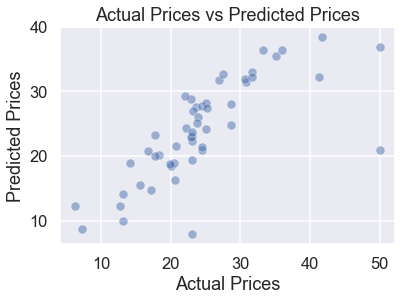

In [12]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, Y_train)

# Fit your model on the training set
Y_fitted = linear_model.predict(X_train)

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
sns.scatterplot(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices");

As you can see, our model is not perfect. If it were perfect, we would see the identity line (i.e. a line of slope 1). 

To see how we are doing, compute the root mean squared error (RMSE) of the predicted responses: 

$$
\textbf{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 }
$$

Fill out the function below and compute the RMSE for our predictions on both the training data `X_train` and the test set `X_test`.

In [10]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y - predicted_y)**2))

train_error = rmse(Y_train, Y_fitted)
test_error = rmse(Y_test, Y_pred)

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 4.56230596093393
Test RMSE: 5.887073477757788


---

## 2 | Logistic Regression

In this section, we will be working on the breast cancer dataset. This dataset can be easily loaded using the `sklearn.datasets.load_breast_cancer()` method.  

In [17]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let us try to fit a simple model with only one feature.

In [20]:
from sklearn.model_selection import train_test_split

x = cancer[["mean radius"]]
y = (cancer_data.target == 0)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

We can now fit our model using `sklearn.linear_model`.

In [32]:
lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs')

lr.fit(x_train, y_train)

# Fit your model on the training set
y_fitted = lr.predict(x_train)

# Predict housing prices on the test set
y_pred = lr.predict(x_test)